In [1]:
import numpy as np

import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

from sklearn.feature_extraction.text import TfidfTransformer

from sklearn.ensemble import RandomForestClassifier

from sklearn.naive_bayes import MultinomialNB , GaussianNB

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve,roc_auc_score,auc


In [2]:
import nltk
from nltk.corpus import stopwords
import nltk.data
from bs4 import BeautifulSoup
import re



In [3]:
train = pd.read_csv("labeledTrainData.tsv", 
                    header=0, delimiter="\t", 
                    quoting=3)

In [4]:
train.head(10)

,id,sentiment,review
0,"""5814_8""",1,"""With all this stuff going down at the moment ..."
1,"""2381_9""",1,"""\""The Classic War of the Worlds\"" by Timothy ..."
2,"""7759_3""",0,"""The film starts with a manager (Nicholas Bell..."
3,"""3630_4""",0,"""It must be assumed that those who praised thi..."
4,"""9495_8""",1,"""Superbly trashy and wondrously unpretentious ..."
5,"""8196_8""",1,"""I dont know why people think this is such a b..."
6,"""7166_2""",0,"""This movie could have been very good, but com..."
7,"""10633_1""",0,"""I watched this video at a friend's house. I'm..."
8,"""319_1""",0,"""A friend of mine bought this film for £1, and..."
9,"""8713_10""",1,"""<br /><br />This movie is full of references...."


In [5]:
X_train , X_test, y_train , y_test = train_test_split(train.drop(columns =['sentiment']),train.sentiment,test_size =0.2)

In [6]:
X_train.head()

,id,review
18942,"""1092_2""","""Well, I suppose the good news concerning Will..."
2067,"""10441_1""","""I stopped watching this POS as soon as the sn..."
2921,"""8749_7""","""I loved the movie, but like everyone said, th..."
15374,"""4501_4""","""True, the setting in Paris is great. The acto..."
21313,"""2688_1""","""In order to avoid confusion, let me clarify a..."


In [7]:
X_train = X_train.reset_index(drop = True)
X_test  = X_test.reset_index(drop = True)

In [8]:
def review_word(review , string = True , remove_stopwords = True):
    
    # remove HTML from text 
    review_text = BeautifulSoup(review).get_text()
    # remove  non letter 
    review_text = re.sub("[^a-zA-Z]"," ",review_text)
    
    # convert into lower case and split 
    
    words = review_text.lower().split()
    # remove the stop word 
    
    if remove_stopwords:
        
        stops = set(stopwords.words("english"))
        
        words = [word for word in words if not word in stops]
        
     # join the words into a sentence   
    if string:
        
        return " ".join(words)
    
    else:
        
        return words
        
        
        
        

In [9]:
clean_train = [review_word(X_train["review"][i]) for i in range(len(X_train))]

clean_test  = [review_word(X_test["review"][i]) for i in range(len(X_test))]

In [10]:
clean_train[0]

'well suppose good news concerning william winckler opus double avenger manages unite three russ meyer mammarian marvels kitten natividad haji raven de la croix one picture assume lorna maitland tura satana babette bardot busy week shot thing else managed see copy script advance bad news though plenty film even called shot straight video complete misfire total abortion atrocity absolute abomination truly one worst pictures ever seen look lamest superhero movie ever made plot deals kitten gaining superpowers fellating rare cockazilla plant south america cure breast cancer oy later battling trio megalunged bikini dancers back l bad every lame boob joke trotted falls completely pardon expression flat zero actual nudity film old photos kitten heyday shaving cream papier mache boulder sum total special fx meyer gals bit long tooth saggy chest put kindly although sheri dawn thomas bikini girl ooga boobies manage uh stand nicely given juvenile unfunny failed embarrassment movie stars instead 

In [23]:
clean_train[1]

'really bad anyone thinks good film let alone funny true mystery like comedies much next man loved christmas story fact director based writer memoirs completely puzzled film complete failure every level charles grodin woefully miscast father starters another seem pacing flow well everything seems tired forced joy life permeated first film completely absent want movie end even recommend movie curiosity seekers enjoyed christmas story bad'

In [42]:
y_test

21791    1
3233     1
1769     0
3695     1
6900     1
        ..
14337    0
21900    0
5199     1
6735     0
2184     0
Name: sentiment, Length: 5000, dtype: int64

In [11]:
y_train

18942    0
2067     0
2921     1
15374    0
21313    0
        ..
19914    1
2148     1
23682    0
14060    0
10317    0
Name: sentiment, Length: 20000, dtype: int64

In [12]:
# Bag Of Word 
Vectorizer = CountVectorizer(analyzer="word",tokenizer = None,    
                             preprocessor = None, 
                             stop_words = None,
                            max_features = 5000)

train_feat = Vectorizer.fit_transform(clean_train).toarray()

test_feat  = Vectorizer.transform(clean_test).toarray()

In [13]:
Vectorizer.vocabulary_

{'well': 4861,
 'suppose': 4335,
 'good': 1902,
 'news': 2998,
 'concerning': 888,
 'william': 4895,
 'double': 1285,
 'manages': 2709,
 'three': 4488,
 'de': 1089,
 'la': 2473,
 'one': 3096,
 'picture': 3260,
 'assume': 265,
 'busy': 582,
 'week': 4855,
 'shot': 3965,
 'thing': 4470,
 'else': 1401,
 'managed': 2707,
 'see': 3867,
 'copy': 950,
 'script': 3846,
 'advance': 70,
 'bad': 323,
 'though': 4480,
 'plenty': 3299,
 'film': 1679,
 'even': 1490,
 'called': 597,
 'straight': 4235,
 'video': 4750,
 'complete': 876,
 'total': 4546,
 'absolute': 8,
 'truly': 4613,
 'worst': 4957,
 'pictures': 3261,
 'ever': 1495,
 'seen': 3877,
 'look': 2627,
 'superhero': 4328,
 'movie': 2917,
 'made': 2680,
 'plot': 3301,
 'deals': 1094,
 'rare': 3524,
 'plant': 3285,
 'south': 4107,
 'america': 154,
 'cure': 1038,
 'later': 2500,
 'trio': 4603,
 'dancers': 1063,
 'back': 319,
 'every': 1496,
 'lame': 2485,
 'joke': 2377,
 'falls': 1600,
 'completely': 877,
 'expression': 1562,
 'flat': 1714,
 'ze

In [14]:
vocab = Vectorizer.get_feature_names()

In [15]:
len(vocab)

5000

In [16]:
# predicton on the test and train datasets

def predict(test_feat,train_feat,y_test,y_train,model,title = "Random forest"):
    
    model.fit(train_feat,y_train)
    
    preds = model.predict(test_feat)
    
    fpr,tpr,_ = roc_curve(y_test,preds)
    
    roc_auc = auc(fpr,tpr)
    
    print("AUC :",roc_auc)
    
    plt.plot(fpr,tpr)
    
    plt.title(title)
    
    plt.plot([0,1],[0,1],color = "navy",linestyle ="--")
    
    
    plt.xlabel("False positive Rate")
    
    plt.ylabel("True positive Rate")
    
    plt.show()
    
    return preds



AUC : 0.8476076096833234


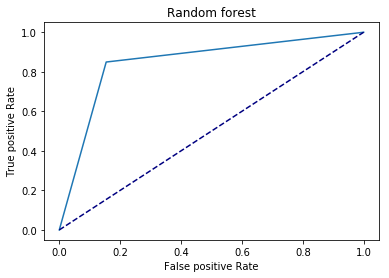

AUC : 0.8508059116024487


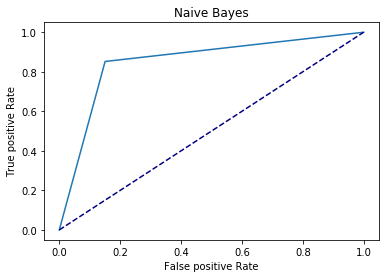

In [17]:
preds_rf = predict(test_feat,train_feat,y_test,y_train,RandomForestClassifier(n_estimators=100))

preds_nb = predict(test_feat,train_feat,y_test,y_train,MultinomialNB(),title = "Naive Bayes")

# TF-IDF 

In [19]:

tfidf_transformer = TfidfTransformer().fit(train_feat)
train_tfidf = tfidf_transformer.transform(train_feat)


test_tfidf = tfidf_transformer.transform(test_feat)

AUC : 0.8449644385115297


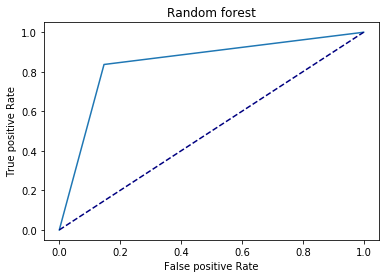

AUC : 0.8552535177081029


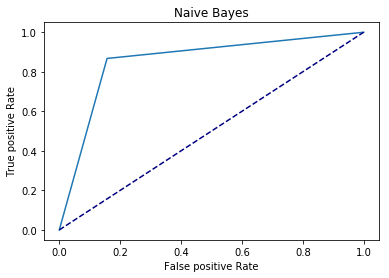

In [20]:
preds_rf = predict(test_tfidf,train_tfidf,y_test,y_train,RandomForestClassifier(n_estimators=100))

preds_nb = predict(test_tfidf,train_tfidf,y_test,y_train,MultinomialNB(),title = "Naive Bayes")